In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_excel('data.xlsx')
data = data.dropna()
data.head()

,Проект,Контрагент,Документ продажи,Стоимость,Себестоимость,Валовая прибыль
0,Дашкина,Токио ООО Фэншуй (Цех Шилкинская) Чемпион,Реализация товаров и услуг М142162 от 30.12.20...,512198.62,363859.69,148338.93
1,Захаров,Кофе Машина ИП Голубева Т.О. Иркутск (новая к...,Реализация товаров и услуг М120114 от 08.11.20...,353790.00,234340.50,119449.50
2,Дашкина,Токио ООО Фьюжн Фирсова ( 2 этаж )(компания) Хоум,Реализация товаров и услуг М141755 от 27.12.20...,302598.93,213312.46,89286.47
3,Перевалов В.А.,ООО Фэмели /Токио Находка,Реализация товаров и услуг М140701 от 26.12.20...,292942.03,206812.19,86129.84
4,Захаров,Кофе Машина ИП Голубева Т.О. Иркутск (новая к...,Реализация товаров и услуг М103585 от 01.10.20...,306941.00,204327.78,102613.22


In [26]:
data['Стоимость'] = data.Стоимость.astype('int64')
data['Себестоимость'] = data.Себестоимость.astype('int64')

In [27]:
top_salesman = data.groupby('Проект')[['Стоимость']].sum()\
    .sort_values('Стоимость', ascending=False)

top_salesman

,Стоимость
Проект,
Дашкина,118425108
Захаров,113632830
Буслаева,50609725
Книга,44039792
Перевалов В.А.,33283179
Медведкова,31278122
Камшилова,26488082
Хамидов,24279059
Гаврилков,21482491


In [28]:
top_salesman.style.bar()

,Стоимость
Проект,
Дашкина,118425108
Захаров,113632830
Буслаева,50609725
Книга,44039792
Перевалов В.А.,33283179
Медведкова,31278122
Камшилова,26488082
Хамидов,24279059
Гаврилков,21482491


Большая часть объема продаж отдела в рассматриваемом периоде было сгенерировано двумя сотрудниками. 

In [46]:
top_salesman_count = data.groupby('Проект')[['Документ продажи']].count().reset_index().sort_values('Документ продажи', ascending=False)
top_salesman_count.rename(columns={'Документ продажи': 'Кол-во документов продажи'}, inplace=True)


top_salesman_count

,Проект,Кол-во документов продажи
3,Захаров,10698
2,Дашкина,9032
0,Буслаева,6521
9,Перевалов В.А.,5474
5,Книга,4753
8,Остапенко,4699
4,Камшилова,3932
6,Медведкова,3751
1,Гаврилков,3423
10,Потапенко А.Л.,3386


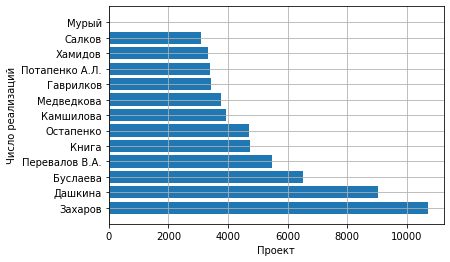

In [47]:
plt.barh(top_salesman_count['Проект'], top_salesman_count['Кол-во документов продажи'])
plt.xlabel('Проект')
plt.ylabel('Число реализаций')
plt.grid()

Наибольшее число реализаций проведено по тем же проектам, которые сгенерировали наибольший объем продаж в рублях. 

In [44]:
average_sale = data.groupby('Проект')[['Стоимость']].mean().reset_index().sort_values('Стоимость', ascending=False)
average_sale.rename(columns={'Стоимость': 'Средний чек'}, inplace=True)

average_sale

,Проект,Средний чек
7,Мурый,14055.600000
2,Дашкина,13111.725864
3,Захаров,10621.876052
5,Книга,9265.683147
6,Медведкова,8338.608904
0,Буслаева,7761.037418
12,Хамидов,7262.655998
4,Камшилова,6736.541709
1,Гаврилков,6275.924920
9,Перевалов В.А.,6080.229996


In [61]:
avg_sale = average_sale.merge(top_salesman_count, how='left', on=['Проект'])
avg_sale.reset_index(level=0, drop=True)

,Проект,Средний чек,Кол-во документов продажи
0,Мурый,14055.600000,5
1,Дашкина,13111.725864,9032
2,Захаров,10621.876052,10698
3,Книга,9265.683147,4753
4,Медведкова,8338.608904,3751
5,Буслаева,7761.037418,6521
6,Хамидов,7262.655998,3343
7,Камшилова,6736.541709,3932
8,Гаврилков,6275.924920,3423
9,Перевалов В.А.,6080.229996,5474


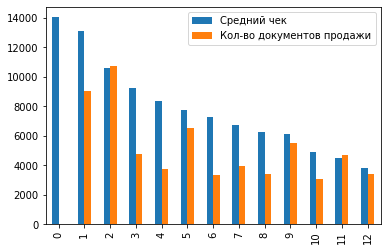

In [52]:
avg_sale.plot(kind='bar')

Проект "Мурый" можно не учитывать в анализе, так как его продажи являются статистическим выбросом. Наибольший размер среднего чека так же зафиксирован по проектам "Захаров" и "Дашкина", по которым зафиксированы наибольшие объемы продаж и количество реализаций. При этом по проектам "Книга" и "Медведкова" величина среднего чека значительно выше кол-ва реализаций, соответсвенно, для формирования своего объема продаж, данные сотрудники затрачивают меньше сил. Возможно имеет смысл перераспределить клиентскую базу для более равномерной нагрузки на сотрудников. 


In [62]:
import seaborn as sns

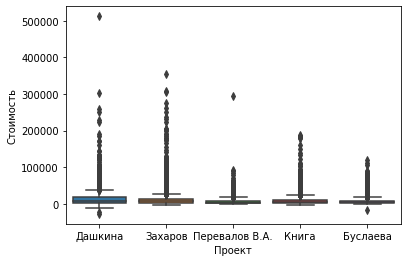

In [72]:
top_sm = data.Проект.value_counts().sort_values(ascending = False).head().index.values
top_sm
ax = sns.boxplot(x="Проект", y="Стоимость", 
                 data=data[data.Проект.isin(top_sm)])

По выбранным пяти проектам наблюдается плотная выборка при очень маленьком значении медианы. Так же замечены некие крупные скорее всего разовые отгрузки по проектам "Дашкина" и "Перевалов В.А."

In [73]:
!pip install plotly
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [80]:
sales = data.groupby('Проект')[['Стоимость']].sum()\
    .sort_values('Стоимость', ascending=False).reset_index()
sales.rename(columns={'Проект': 'Salesman'}, inplace=True)
sales.rename(columns={'Стоимость': 'Value'}, inplace=True)

sales

,Salesman,Value
0,Дашкина,118425108
1,Захаров,113632830
2,Буслаева,50609725
3,Книга,44039792
4,Перевалов В.А.,33283179
5,Медведкова,31278122
6,Камшилова,26488082
7,Хамидов,24279059
8,Гаврилков,21482491
9,Остапенко,21035547


In [81]:
trace0 = go.Scatter(
    x=sales.Salesman,
    y=sales.Value,
    name='Value'
)

data_1 = [trace0]
layout = {'title': 'Value'}

fig = go.Figure(data=data_1, layout=layout)

iplot(fig)
